# Programming Exercise - Support Vector Machines

In [44]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import re

from scipy.io import loadmat
from sklearn.svm import SVC

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
 
#%config InlineBackend.figure_formats = {'pdf',}
%matplotlib inline

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

In [7]:
def plot_data(X, y):
    pos = (y==1).ravel()
    neg = (y==0).ravel()
    
    plt.scatter(X[pos,0], X[pos,1], s=60, c='k', marker='+', linewidths=1)
    plt.scatter(X[neg,0], X[neg,1], s=60, c='y', marker='o', linewidths=1)

In [16]:
def plot_svc(svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:,0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:,1].max()+pad
    
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
    
    plot_data(X, y)
    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='k', marker='|', s=100, linewidths='1')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    print("Number of support vectors: ", svc.support_.size)

## Support Vector Machines

### Example Dataset 1

In [17]:
data1 = loadmat('data/ex6data1.mat')
data1.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [18]:
y1 = data1['y']
X1 = data1['X']

print("X1: ", X1.shape)
print("y1: ", y1.shape)

X1:  (51, 2)
y1:  (51, 1)


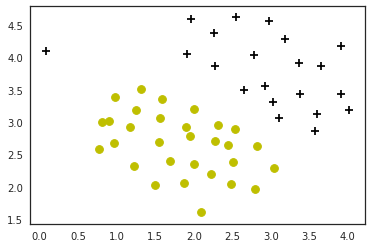

In [19]:
plot_data(X1, y1)

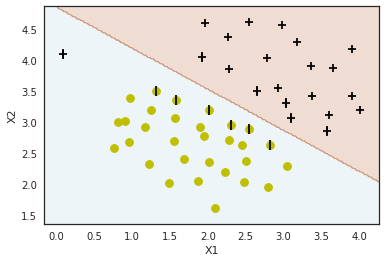

Number of support vectors:  12


In [20]:
clf = SVC(C=1.0, kernel='linear')
clf.fit(X1, y1.ravel())
plot_svc(clf, X1, y1)

### SVM with Gaussian Kernels

In [21]:
def gaussian(x1, x2, sigma=2):
    norm = (x1-x2).T.dot(x1-x2)
    return np.exp(-norm/(2*sigma**2))

In [22]:
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])

sigma = 2

gaussian(x1, x2, sigma)

0.32465246735834974

### Example dataset 2

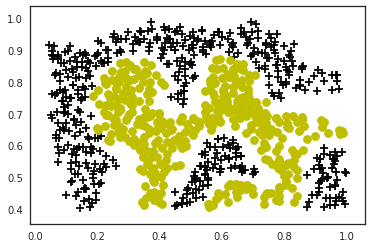

In [23]:
data2 = loadmat('data/ex6data2.mat')

X2 = data2['X']
y2 = data2['y']
plot_data(X2, y2)

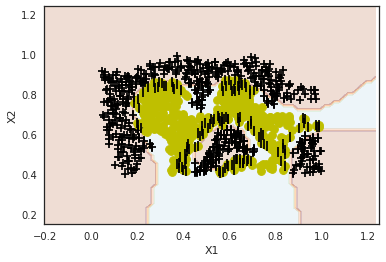

Number of support vectors:  254


In [24]:
clf2 = SVC(C=50, kernel='rbf', gamma=6)
clf2.fit(X2, y2.ravel())
plot_svc(clf2, X2, y2)

### Exemple dataset 3

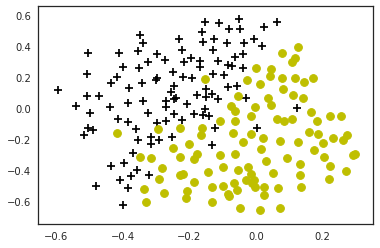

In [25]:
data3 = loadmat('data/ex6data3.mat')

X3 = data3['X']
y3 = data3['y']

plot_data(X3, y3)

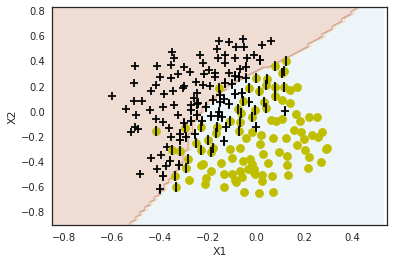

Number of support vectors:  78


In [28]:
clf3 = SVC(C=1.0, kernel='poly', degree=3, gamma=10)
clf3.fit(X3, y3.ravel())
plot_svc(clf3, X3, y3)

### Spam Classification

In [31]:
vocab = pd.read_table('data/vocab.txt')
print(vocab)

         1         aa
0        2         ab
1        3       abil
2        4        abl
3        5      about
4        6       abov
5        7    absolut
6        8       abus
7        9         ac
8       10     accept
9       11     access
10      12     accord
11      13    account
12      14     achiev
13      15     acquir
14      16     across
15      17        act
16      18     action
17      19      activ
18      20     actual
19      21         ad
20      22       adam
21      23        add
22      24      addit
23      25    address
24      26  administr
25      27      adult
26      28     advanc
27      29   advantag
28      30   advertis
29      31      advic
30      32      advis
31      33         ae
32      34         af
33      35     affect
34      36     affili
35      37     afford
36      38     africa
37      39      after
38      40         ag
39      41      again
40      42    against
41      43      agenc
42      44      agent
43      45        ago
44      46

In [98]:
def preprocess(file):
    with open(file) as f:
        email_contents = f.read()
    email_contents = email_contents.lower()
    email_contents = re.sub('<[^<>]+>', ' ', email_contents)
    email_contents = re.sub('[0-9]+', 'number', email_contents)
    email_contents = re.sub('(http|https)://[^\s]*', "httpaddr", email_contents)
    email_contents = re.sub('[^\s]+@[^\s]+', 'emailaddr', email_contents)
    email_contents = re.sub('[$]+', 'dollar', email_contents)
    
    [str, email_con]
    return tokens

In [99]:
sample_email = 'data/ex6emailSample1.txt'
print(preprocess(sample_email))

['>', 'anyone', 'knows', 'how', 'much', 'it', 'costs', 'to', 'host', 'a', 'web', 'portal', '?', '>', 'well,', 'it', 'depends', 'on', 'how', 'many', 'visitors', "you're", 'expecting.', 'this', 'can', 'be', 'anywhere', 'from', 'less', 'than', 'number', 'bucks', 'a', 'month', 'to', 'a', 'couple', 'of', 'dollarnumber.', 'you', 'should', 'checkout', 'httpaddr', 'or', 'perhaps', 'amazon', 'ecnumber', 'if', 'youre', 'running', 'something', 'big..', 'to', 'unsubscribe', 'yourself', 'from', 'this', 'mailing', 'list,', 'send', 'an', 'email', 'to:', 'emailaddr']
